In [1]:
# Import Packages
from keras.callbacks import ModelCheckpoint,LearningRateScheduler,EarlyStopping
from keras.optimizers import Adam, Adadelta, RMSprop
from models import model
from utils import train_val_generator
from matplotlib import pyplot as plt
from keras.models import load_model
from os.path import isfile
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Training Parameters
choices=['vgg_16','vgg_19','resnet_152','simple'] # All Models Available
model_name = choices[1]

is_transfer = True
num_freeze_layer = 6
num_classes = 10
weights_path = 'resnet152_weights_tf.h5'
input_shape = (224,224,3) # Input Shape for Resnet152

In [3]:
# Path to Data
train_path = './train_shoes'
test_path ='./test_shoes'

In [4]:
# Model for Traning
tr_model = model(model_name,num_classes,is_transfer,
                num_freeze_layer,weights_path,input_shape)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________

In [5]:
# Train and Test generator
train_gen, val_gen = train_val_generator(32,train_path,test_path)

Found 25991 images belonging to 10 classes.
Found 4178 images belonging to 10 classes.


In [6]:
# Load last model if exists
#model_name = model_name+'.h5'
if isfile(model_name+"_shoes.h5"):
    print('Loading previously trained weights and continue traning.....')
    tr_model = load_model(model_name+".h5")
else:
    print('No saved weights found.')
    
print(model_name+"_shoes.h5")

No saved weights found.
vgg_19_shoes.h5


In [7]:
# Model saving
checkpoint = ModelCheckpoint(model_name+'_shoes.h5',monitor='val_acc',verbose=1,save_best_only=True)
early_stop = EarlyStopping(monitor='val_acc',min_delta=0,patience=3,verbose=1,mode='auto')

# Compile the model
tr_model.compile(loss='categorical_crossentropy',optimizer=RMSprop(1e-5),metrics=['accuracy'])


In [8]:
# Train the model
history = tr_model.fit_generator(
                train_gen,
                steps_per_epoch= 1000,
                epochs=10,
                validation_data = val_gen,
                validation_steps = 200,
                callbacks = [checkpoint,early_stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
1000/1000 [==============================] - 607s 607ms/step - loss: 0.9570 - acc: 0.6801 - val_loss: 0.6220 - val_acc: 0.8033

Epoch 00001: val_acc improved from -inf to 0.80332, saving model to vgg_19_shoes.h5
Epoch 2/10
1000/1000 [==============================] - 599s 599ms/step - loss: 0.6278 - acc: 0.7932 - val_loss: 0.5197 - val_acc: 0.8330

Epoch 00002: val_acc improved from 0.80332 to 0.83302, saving model to vgg_19_shoes.h5
Epoch 3/10
1000/1000 [==============================] - 599s 599ms/step - loss: 0.5397 - acc: 0.8267 - val_loss: 0.4805 - val_acc: 0.8503

Epoch 00003: val_acc improved from 0.83302 to 0.85030, saving model to vgg_19_shoes.h5
Epoch 4/10
1000/1000 [==============================] - 599s 599ms/step - loss: 0.4914 - acc: 0.8418 - val_loss: 0.4055 - val_acc: 0.8691

Epoch 00004: val_acc improved from 0.85030 to 0.86911, saving model to vgg_19_shoes.h5
Epoch

In [9]:
tr_model.save("vanilla_shoes.h5")

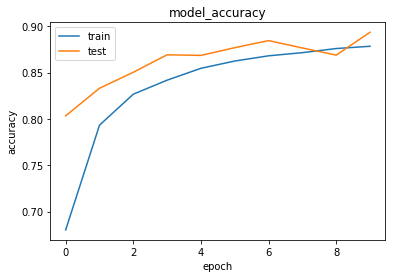

In [10]:
# Plot the Results
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.savefig(model_name+'.jpg')